# sustainability_topic_modeling

In [56]:
import pickle
with open ('sustainability_english.pickle', 'rb') as read_file:
    tweets = pickle.load(read_file)

In [2]:
from pymongo import MongoClient
import json
import pprint
import re

In [225]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
client = MongoClient()
db = client.environment
sustainability_collection = db.sustainability

In [4]:
def cleaned_text(my_text):
    
    words = re.sub('[%s]'% re.escape(string.punctuation), ' ', post['text']) 
    words = list(word_tokenize(words))
    words = [re.sub('[%s]'% re.escape(string.punctuation), ' ', word) for word in words]
    words=[word.lower() for word in words if word.isalpha()]
    
    return words

In [169]:
tweets = []
for doc in sustainability_collection.find({}):
    tweets.append(doc['text'])

In [171]:
len(tweets)

11073

In [172]:
tweets[1]

'Are you in Melbourne or Sydney? Join us at #SPFAustralia to learn about the latest trends in #EHS, #RiskManagement… https://t.co/BG7eWM1FCO'

In [173]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.5)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(tweets)
tfidf_data = tfidf_vectorizer.fit_transform(tweets)

In [32]:
count_vectorizer.get_feature_names()

['aaa',
 'aaa meeting',
 'aaa space',
 'aagbi',
 'aagbi apply',
 'aaj',
 'aaj sampreeth',
 'aandrsolar',
 'aandrsolar pete',
 'aandrsolar use',
 'aapg',
 'aapg rt',
 'aapgeducation',
 'aapgeducation bold',
 'aarhus',
 'aarhus denmark',
 'aasbaustralia',
 'aasbaustralia great',
 'aashenews',
 'aashenews did',
 'aashenews sustainability',
 'ab',
 'ab albertamade',
 'ab https',
 'ab invests',
 'ab love',
 'ab play',
 'abandoned',
 'abandoned wouldn',
 'abandons',
 'abandons dead',
 'abb',
 'abb location',
 'abbiestutzer',
 'abbiestutzer speaking',
 'abc',
 'abc cleanwater',
 'abc news',
 'abcnews',
 'abcnews https',
 'abcscience',
 'abcscience catalyst',
 'abdulelsayed',
 'abdulelsayed courage',
 'abdulelsayed victory',
 'abdullah',
 'abdullah https',
 'aber',
 'aber mehr',
 'abetterbackpack',
 'abetterbackpack kickstarter',
 'abetz',
 'abetz missed',
 'abilities',
 'abilities instead',
 'abilities maximise',
 'ability',
 'ability https',
 'ability improve',
 'ability sell',
 'ability wor

In [249]:
tfidf_vectorizer.get_feature_names()

['aaa',
 'aaa meeting',
 'aaa space',
 'aagbi',
 'aagbi apply',
 'aaj',
 'aaj sampreeth',
 'aandrsolar',
 'aandrsolar pete',
 'aandrsolar solar',
 'aandrsolar use',
 'aapg',
 'aapg rt',
 'aapgeducation',
 'aapgeducation bold',
 'aappxfkjkl',
 'aaratitamore',
 'aaratitamore work',
 'aarey',
 'aarey milk',
 'aarhus',
 'aarhus denmark',
 'aarhus https',
 'aasbaustralia',
 'aasbaustralia great',
 'aashenews',
 'aashenews did',
 'aashenews sustainability',
 'ab',
 'ab albertamade',
 'ab https',
 'ab invests',
 'ab love',
 'ab play',
 'aba',
 'aba love',
 'abandoned',
 'abandoned wouldn',
 'abandons',
 'abandons dead',
 'abb',
 'abb location',
 'abbiestutzer',
 'abbiestutzer speaking',
 'abc',
 'abc cleanwater',
 'abc news',
 'abcnews',
 'abcnews https',
 'abcscience',
 'abcscience catalyst',
 'abdulelsayed',
 'abdulelsayed courage',
 'abdulelsayed victory',
 'abdullah',
 'abdullah https',
 'aber',
 'aber mehr',
 'abetterbackpack',
 'abetterbackpack kickstarter',
 'abetz',
 'abetz missed',
 

In [33]:
len(count_vectorizer.get_feature_names())

54886

In [34]:
cv_data.shape

(10379, 54886)

In [35]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 10
n_iter = 10
lda = LatentDirichletAllocation(n_topics=n_topics,
                                max_iter=n_iter,
                                random_state=42,
                               learning_method='online')
data = lda.fit_transform(cv_data) 

#fit = learn correlation, transform = how does it get distributed
#data = Normalizer().fit_transform(data)
data[0] 

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


array([0.0043479 , 0.00434793, 0.00434785, 0.00434796, 0.00434785,
       0.96086901, 0.00434784, 0.00434794, 0.00434785, 0.00434787])

In [212]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
from sklearn.decomposition import NMF, TruncatedSVD

n_comp = 20
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [252]:
lda.components_

array([[0.10000001, 0.10000001, 0.10000001, ..., 0.10000001, 0.10000784,
        0.10001713],
       [0.10000265, 0.10000429, 0.10000001, ..., 0.10000001, 0.10000537,
        0.10000001],
       [0.10000193, 0.1000026 , 0.1000034 , ..., 0.10000001, 0.10000001,
        0.10003801],
       ...,
       [0.10000098, 0.10000102, 0.10000395, ..., 1.57605089, 1.32964129,
        1.16512902],
       [0.10000001, 0.10000001, 0.10000001, ..., 0.10000001, 0.10009093,
        0.10000001],
       [2.13903333, 1.44863414, 0.79037412, ..., 0.10000001, 0.10000001,
        0.10000001]])

In [251]:
display_topics(lda,count_vectorizer.get_feature_names(),10)


Topic  0
short time, rt soronafiber, itshughwitting shocked, ecorismo, stop online, increasing automation, elecreviewmag, slcek, hiring amp, corp infrastructure

Topic  1
short time, marks, energy asset, digitaldisruption artificialintelligence, buyers, newtechnologies rolls, offgrid solarpower, numbers, feedingameric, facing water

Topic  2
truth, solarcells renewables, short time, forward year, survivalorganicseeds, futureleaders, amberoot, leading australian, chengdu ch, bas https

Topic  3
short time, falter grip, start know, isffinsects fact, ul master, https tjviqfgjqh, inviting experts, ecorismo, population https, amberoot

Topic  4
garden livingwalls, short time, brands proactively, ht mikequindazzi, looking fwd, gate mikeinc, ai solarenergy, force idh, force good, ht processors

Topic  5
short time, talks creation, sustainability livability, changers, solarcells renewables, fisheries swordfish, destroying planet, offgrid solarpower, shares integrate, slcek

Topic  6
trees sto

In [37]:
display_topics(lda,count_vectorizer.get_feature_names(),10)


Topic  0
sustainability, solar, latest, energy, thanks, job, environment, sustainability https, https thanks, csr

Topic  1
sustainability, need, evankirstel, drones, car, people, plastic, pilot, free, fly

Topic  2
world, sustainable, sustainability, global, today, great, amp, making, clean, beef

Topic  3
sustainability, food, tech, land, year, innovation, la, energy, reduce, amp

Topic  4
green, sustainability, build, ico, mining ico, green mining, airdrop, gh green, gh, ico airdrop

Topic  5
sustainability, use, trees, circulareconomy, sustainable, future, doing, plastic, support, sustainability https

Topic  6
work, sustainability, countries, en, problem, ai, inspired, know, developers, iot

Topic  7
sustainability, make, fashion, sustainability https, business, industry, planet, isn, time, costs

Topic  8
sustainability, great, learn, amp, plastics, join, community, new, article, environment

Topic  9
sustainability, climatechange, mining, greenhashes, plastic, climate, think, w

In [250]:
display_topics(lsa_tfidf,tfidf_vectorizer.get_feature_names(),10)


Topic  0
drones sustainability, license fly, fly car, need pilot, pilot license, license, fly, pilot, car drones, drones

Topic  1
greenhashes, mining, green mining, mining ico, ico, airdrop, gh green, gh, ico airdrop, greenhashes gh

Topic  2
build smartcity, cybersecurity iot, smartcity cybersecurity, components, cybersecurity, iot machinelearning, machinelearning, components needed, needed build, machinelearning bigdata

Topic  3
want know, race mining, mining limited, mathematical, mathematical race, elite, limited elite, elite amp, shift awareness, techie

Topic  4
plastic, kashthefuturist, rt kashthefuturist, waste, sustainability, sustainability climatechange, plastic waste, climatechange plastic, climatechange, rt

Topic  5
https, sustainability, energy, tech, costs solarenergy, cc kirkdborne, unique skylights, tech cc, skylights, skylights reduce

Topic  6
game changing, breaks plastic, changing enzyme, enzyme, enzyme breaks, plastic days, breaks, scientists discovered, disco

In [14]:
display_topics(lsa_cv,count_vectorizer.get_feature_names(),10)


Topic  0
https, sustainability, rt, sustainability https, energy, amp, plastic, sustainable, latest, new

Topic  1
rt, sustainability, plastic, evankirstel, waste, amp, kashthefuturist, rt kashthefuturist, need, iot

Topic  2
amp, mining, greenhashes, https, want, know, rt greenhashes, awareness, shift, limited

Topic  3
rt, https, iot, build, smartcity, cybersecurity, components, build smartcity, cybersecurity iot, smartcity cybersecurity

Topic  4
need, drones, car, pilot, fly, license, drones sustainability, pilot license, need pilot, fly car

Topic  5
sustainability, iot, build, smartcity, cybersecurity, components, build smartcity, cybersecurity iot, smartcity cybersecurity, bigdata

Topic  6
plastic, waste, kashthefuturist, rt kashthefuturist, climatechange, sustainability climatechange, plastic waste, climatechange plastic, sdgs, waste sdgs

Topic  7
green, airdrop, ico, green mining, mining ico, gh green, gh, ico airdrop, greenhashes gh, mining

Topic  8
innovation, rt duflotv

In [16]:
display_topics(nmf_cv,count_vectorizer.get_feature_names(),10)


Topic  0
https, https https, latest, sustainability https, sustainable, job, thanks, new, green, https thanks

Topic  1
rt, great, sustainable, new, world, help, change, need, make, global

Topic  2
want, know, crypto, race, awareness, limited, mining, shift, amp, race mining

Topic  3
sustainability, sustainability https, https sustainability, csr, thanks, news, latest, https thanks, sustainability csr, environment

Topic  4
need, drones, car, pilot, fly, license, fly car, need pilot, drones sustainability, pilot license

Topic  5
iot, build, smartcity, cybersecurity, components, build smartcity, smartcity cybersecurity, cybersecurity iot, needed, machinelearning

Topic  6
plastic, climatechange, sustainability climatechange, waste, plastic waste, climatechange plastic, kashthefuturist, rt kashthefuturist, sdgs, waste sdgs

Topic  7
green, airdrop, ico, mining, mining ico, green mining, gh, gh green, greenhashes, ico airdrop

Topic  8
plastic, innovation, changing, days, game, scient

In [42]:
count_vectorizer.vocabulary_

{'angelurena': 1782,
 'visit': 52207,
 'concludes': 8982,
 'week': 53141,
 'stops': 45435,
 'miami': 30269,
 'caribbean': 6237,
 'president': 36250,
 'billclinton': 4177,
 'promote': 36881,
 'sustainability': 46413,
 'rt angelurena': 39943,
 'angelurena visit': 1784,
 'visit concludes': 52211,
 'concludes week': 8983,
 'week stops': 53175,
 'stops miami': 45437,
 'miami caribbean': 30270,
 'caribbean president': 6242,
 'president billclinton': 36252,
 'billclinton promote': 4179,
 'promote sustainability': 36887,
 'melbourne': 30051,
 'sydney': 47774,
 'join': 25568,
 'spfaustralia': 44707,
 'learn': 27356,
 'latest': 26890,
 'trends': 50322,
 'ehs': 13748,
 'riskmanagement': 39517,
 'melbourne sydney': 30056,
 'sydney join': 47779,
 'join spfaustralia': 25601,
 'spfaustralia learn': 44708,
 'learn latest': 27390,
 'latest trends': 27035,
 'trends ehs': 50327,
 'ehs riskmanagement': 13749,
 'riskmanagement https': 39518,
 'vienna': 52072,
 'does': 12398,
 'quality': 37364,
 'life': 277

In [41]:
count_vectorizer.vocabulary_['sustainability']

46413

In [39]:
#Topic Modeling graph using py LDA vis

import pyLDAvis, pyLDAvis.sklearn
from IPython.display import display

pyLDAvis.enable_notebook()

vis = pyLDAvis.sklearn.prepare(lda, cv_data, count_vectorizer)

display(vis)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.178678  0.144045       1        1  12.391074
2      0.056778  0.077887       2        1  10.473041
9      0.089140 -0.266930       3        1  10.136615
7      0.022301  0.015738       4        1  10.063559
3      0.056347  0.046361       5        1  10.018126
5      0.001241 -0.069998       6        1   9.833478
8      0.009788  0.059645       7        1   9.516239
4     -0.214292  0.013254       8        1   9.337526
1     -0.030150 -0.074333       9        1   9.147984
6     -0.169830  0.054331      10        1   9.082358, topic_info=      Category        Freq                          Term        Total  \
term                                                                    
19490  Default  412.000000                         green   412.000000   
54007  Default  356.000000                         world   356.000000   
44155  Default  311.000000                         solar   311.000000   
26890  Default  289.000000                        latest   289.000000   
7865   Default  249.000000                 climatechange   249.000000   
47372  Default  435.000000                   sustainable   435.000000   
30525  Default  223.000000                        mining   223.000000   
19694  Default  217.000000                   greenhashes   217.000000   
48628  Default  252.000000                        thanks   252.000000   
35176  Default  418.000000                       plastic   418.000000   
19360  Default  331.000000                         great   331.000000   
15302  Default  248.000000                   evankirstel   248.000000   
7815   Default  178.000000                       climate   178.000000   
49112  Default  172.000000                         think   172.000000   
14327  Default  494.000000                        energy   494.000000   
25438  Default  182.000000                           job   182.000000   
14761  Default  322.000000                   environment   322.000000   
17153  Default  257.000000                          food   257.000000   
46846  Default  390.000000          sustainability https   390.000000   
53805  Default  245.000000                          work   245.000000   
26380  Default  209.000000                          know   209.000000   
51391  Default  213.000000                           use   213.000000   
31611  Default  311.000000                          need   311.000000   
46561  Default  150.000000  sustainability climatechange   150.000000   
52656  Default  286.000000                         waste   286.000000   
5378   Default  147.000000                      building   147.000000   
22610  Default  159.000000                  https thanks   159.000000   
5343   Default  139.000000                         build   139.000000   
29059  Default  181.000000                          make   181.000000   
18704  Default  178.000000                        global   178.000000   
...        ...         ...                           ...          ...   
31205  Topic10   44.703026       multicultural marketing    45.416698   
31204  Topic10   44.703018                 multicultural    45.416699   
24368  Topic10   44.703015        inspired multicultural    45.416699   
29529  Topic10   44.703014      marketing sustainability    45.416699   
46973  Topic10   43.750680           sustainability meet    44.464363   
4156   Topic10   42.209511                   bikesharing    42.923112   
47862  Topic10   41.021200                        tackle    41.735115   
39619  Topic10   40.732391                         robot    41.447109   
34186  Topic10   38.603091                          pass    39.317570   
10616  Topic10   38.341262                  currentstate    39.054926   
13690  Topic10   38.350566                        effort    39.064640   
18108  Topic10   38.115342                  futureofwork    38.828954   
41935  Topic10   37.5948

In [ ]:
import pyLDAvis, pyLDAvis.sklearn
from IPython.display import display

# Setup to run in Jupyter notebook
pyLDAvis.enable_notebook()

# Create the visualization
vis = pyLDAvis.sklearn.prepare(lda, cv_data, count_vectorizer)

# Export as a standalone HTML web page
# pyLDAvis.save_html(vis, 'lda.html')

# Let's view it!
display(vis)

**Cluster on topics**

In [242]:
nmf_cv_data.shape

(11073, 20)

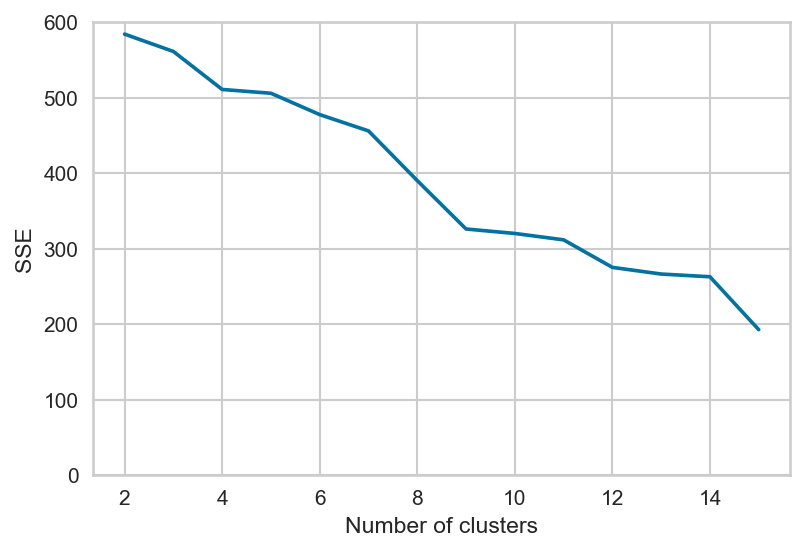

In [243]:
#Need to determine number of clusters to use

SSE = []

for k in range(2,16):
    km = MiniBatchKMeans(n_clusters = k, random_state = 42)
    km.fit(nmf_cv_data)
    labels = km.labels_
    SSE.append(km.inertia_)
    
plt.figure(dpi = 150)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.plot(range(2,16),SSEs);
plt.ylim((0,600))

plt.savefig("cluster_plot")

In [183]:
km = MiniBatchKMeans(n_clusters=9)
clusters = km.fit_predict(nmf_cv_data)

In [77]:
nmf_cv_data

array([[0.10290737, 0.        , 0.00088554, ..., 0.00136249, 0.00179402,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00626543,
        0.00379313],
       [0.1167531 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02489089],
       ...,
       [0.10976665, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06543165, 0.        , 0.01749827, ..., 0.        , 0.00344664,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00426584,
        0.27394488]])

In [78]:
model = TSNE(n_components=2, random_state = 0, verbose = 0)
low_data = model.fit_transform(nmf_cv_data)

In [149]:
df_tsne['x-tsne'] = low_data[:,0]
df_tsne['y-tsne'] = low_data[:,1]

In [193]:
clusters[:50]

array([4, 7, 4, 7, 7, 7, 7, 4, 4, 4, 3, 7, 4, 0, 4, 7, 7, 0, 0, 7, 4, 4,
       7, 4, 7, 7, 4, 7, 4, 3, 7, 7, 0, 5, 4, 7, 7, 4, 1, 4, 7, 7, 7, 7,
       4, 0, 4, 7, 7, 4], dtype=int32)

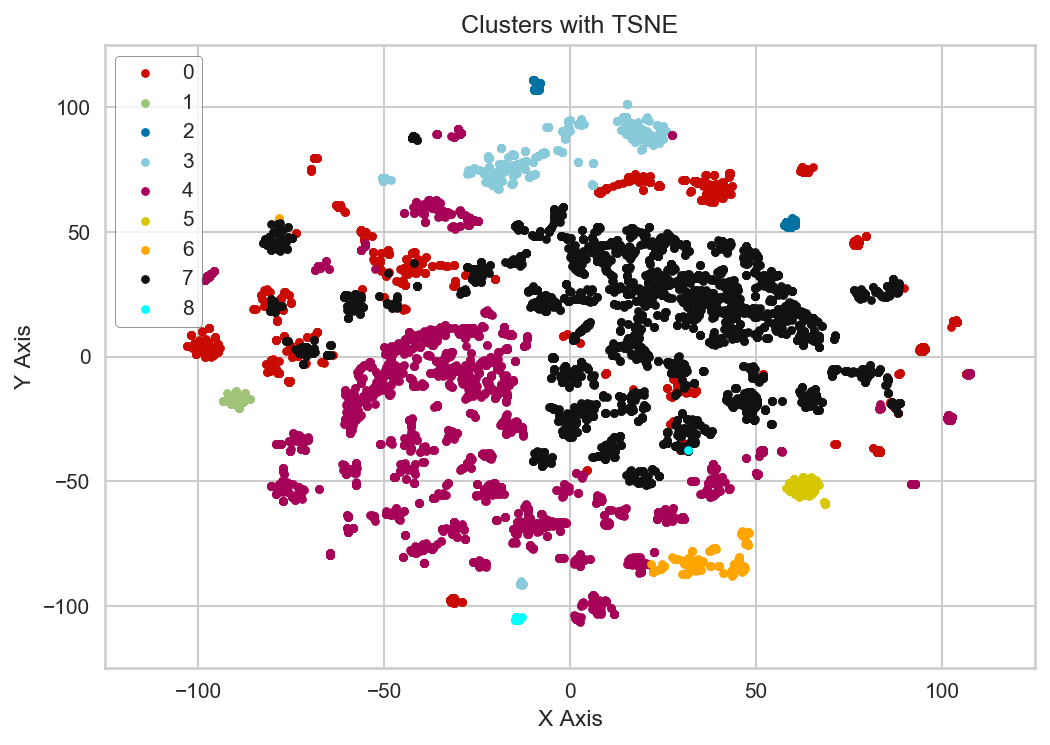

In [205]:
colors = (['r','g','b','c','m','y','orange', 'k', 'aqua', 'yellow'])
plt.figure(dpi = 150)

for i, c, label in zip (range(9), colors, list(range(9))):
    plt.scatter(low_data[clusters == i, 0], low_data[clusters == i, 1], c=c, label = label, s = 15, alpha = 1)

plt.legend(fontsize = 10, loc = 'upper left', frameon = True, facecolor = '#FFFFFF', edgecolor = '#333333');
plt.title("Clusters with TSNE", fontsize = 12);
plt.xlim(-125,125);
plt.ylim(-125,125);
plt.ylabel("Y Axis");
plt.xlabel("X Axis");
plt.yticks(fontsize =10);
plt.xticks(fontsize = 10);

In [ ]:
#Fit using 4 clusters

In [216]:
km_4_clusts = MiniBatchKMeans(n_clusters=4)


In [217]:
clusters_4 = km_4_clusts.fit_predict(nmf_cv_data)


In [218]:
model_4_clusts = TSNE(n_components=2, random_state = 0, verbose = 0)


In [ ]:
low_data_4_clusts = model_4_clusts.fit_transform(nmf_cv_data)

In [214]:
new_colors = (['r','g','b','c'])
plt.figure(dpi = 150)

for i, c, label in zip (range(4), new_colors, list(range(4))):
    plt.scatter(low_data_4_clusts[clusters_4 == i, 0], low_data_4_clusts[clusters_4 == i, 1], c=c, label = label, s = 15, alpha = 1)

plt.legend(fontsize = 10, loc = 'upper left', frameon = True, facecolor = '#FFFFFF', edgecolor = '#333333');
plt.title("Clusters with TSNE", fontsize = 12);
plt.xlim(-125,125);
plt.ylim(-125,125);
plt.ylabel("Y Axis");
plt.xlabel("X Axis");
plt.yticks(fontsize =10);
plt.xticks(fontsize = 10);

NameError: name 'low_data_4_clusts' is not defined

<Figure size 900x600 with 0 Axes>

In [222]:
km_3_clusts = MiniBatchKMeans(n_clusters=3)
clusters_3 = km_3_clusts.fit_predict(nmf_cv_data)
model_3_clusts = TSNE(n_components=2, random_state = 42, verbose = 0)


In [224]:
low_data_3_clusts = model_3_clusts.fit_transform(nmf_cv_data)

KeyboardInterrupt: 

In [221]:
nmf_cv_data

array([[0.10165713, 0.        , 0.00099292, ..., 0.        , 0.00131258,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00349379, 0.        ,
        0.00114353],
       [0.11651554, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00192319, 0.        , 0.        , ..., 0.        , 0.        ,
        0.20862517],
       [0.00379237, 0.        , 0.        , ..., 0.02540295, 0.0002943 ,
        0.00277394],
       [0.00178237, 0.        , 0.        , ..., 0.02075379, 0.00109761,
        0.00243289]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')
#ax.scatter(df_sample['R'],df_sample['G'],df_sample['B'],c=df_sample['color'], alpha=.5);

In [ ]:
from yellowbrick import silhouettevisualizer

In [ ]:
kmeans _components